In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("international_matches.csv")

In [3]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

## Analyze and fill na's

In [5]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [6]:
#We can fill mean for na's in goal_keeper_score
df[df['home_team'] == "Brazil"]['home_team_goalkeeper_score'].describe()

count    135.000000
mean      86.074074
std        3.327026
min       82.000000
25%       83.000000
50%       86.000000
75%       89.000000
max       93.000000
Name: home_team_goalkeeper_score, dtype: float64

In [7]:
df['home_team_goalkeeper_score'] = round(df.groupby("home_team")["home_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
df['away_team_goalkeeper_score'] = round(df.groupby("away_team")["away_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))

In [8]:
#We can fill mean for na's in defense score
df[df['away_team'] == "Uruguay"]['home_team_mean_defense_score'].describe()

count    105.000000
mean      76.580000
std        5.589988
min       58.500000
25%       73.200000
50%       76.500000
75%       80.000000
max       89.500000
Name: home_team_mean_defense_score, dtype: float64

In [9]:
df['home_team_mean_defense_score'] = round(df.groupby('home_team')['home_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_defense_score'] = round(df.groupby('away_team')['away_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))

In [10]:
#We can fill mean for na's in offense score
df[df['away_team'] == "Uruguay"]['home_team_mean_offense_score'].describe()

count    117.000000
mean      78.136752
std        5.878813
min       66.700000
25%       74.000000
50%       78.000000
75%       82.300000
max       90.300000
Name: home_team_mean_offense_score, dtype: float64

In [11]:
df['home_team_mean_offense_score'] = round(df.groupby('home_team')['home_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_offense_score'] = round(df.groupby('away_team')['away_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))

In [12]:
#We can fill mean for na's in midfield score
df[df['away_team'] == "Uruguay"]['home_team_mean_midfield_score'].describe()

count    110.000000
mean      77.729091
std        5.656617
min       63.200000
25%       75.050000
50%       77.650000
75%       81.425000
max       89.500000
Name: home_team_mean_midfield_score, dtype: float64

In [13]:
df['home_team_mean_midfield_score'] = round(df.groupby('home_team')['home_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_midfield_score'] = round(df.groupby('away_team')['away_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))

In [14]:
df.isnull().sum()

date                                0
home_team                           0
away_team                           0
home_team_continent                 0
away_team_continent                 0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
tournament                          0
city                                0
country                             0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       5683
away_team_goalkeeper_score       6254
home_team_mean_defense_score     8019
home_team_mean_offense_score     6995
home_team_mean_midfield_score    6955
away_team_mean_defense_score     8285
away_team_mean_offense_score     7165
away_team_mean_midfield_score    7036
dtype: int64

In [15]:
#Teams are not in FIFA game itself, so they under performing teams, so giving a average score of 50 for all.
df.fillna(50,inplace=True)

In [16]:
df.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

## Filter the teams participating in World cup 22

In [17]:
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']
final_df = df[(df["home_team"].apply(lambda x: x in list_2022)) | (df["away_team"].apply(lambda x: x in list_2022))]

### Mapping numeric values for home_team_result to find the correleations

In [18]:
final_df['home_team_result'] = final_df['home_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})

C:\Users\Solo\AppData\Local\Temp\ipykernel_8820\3721063426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['home_team_result'] = final_df['home_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})


In [19]:
final_df.corr()['home_team_result'].sort_values(ascending=False)

home_team_result                 1.000000
home_team_mean_offense_score     0.165981
home_team_mean_defense_score     0.158841
home_team_mean_midfield_score    0.157639
home_team_score                  0.127916
home_team_goalkeeper_score       0.122509
away_team_fifa_rank              0.111366
home_team_total_fifa_points      0.015498
away_team_total_fifa_points     -0.047726
neutral_location                -0.066361
away_team_mean_offense_score    -0.117055
away_team_mean_defense_score    -0.122354
away_team_goalkeeper_score      -0.124837
away_team_mean_midfield_score   -0.127505
home_team_fifa_rank             -0.186355
away_team_score                 -0.464635
Name: home_team_result, dtype: float64

### Dropping unnecessary colums

In [20]:
final_df = final_df.drop(['date', 'home_team_continent','away_team_continent','home_team_total_fifa_points', 'away_team_total_fifa_points','home_team_score', 'away_team_score', 'tournament', 'city', 'country','neutral_location', 'shoot_out'],axis=1)

In [21]:
final_df.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_result', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_defense_score',
       'home_team_mean_offense_score', 'home_team_mean_midfield_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score'],
      dtype='object')

### Change column names

In [22]:
final_df.rename(columns={"home_team":"Team1", "away_team": "Team2", "home_team_fifa_rank": "Team1_FIFA_RANK", 
                         "away_team_fifa_rank":"Team2_FIFA_RANK", "home_team_result":"Team1_Result", "home_team_goalkeeper_score":"Team1_Goalkeeper_Score",
                        "away_team_goalkeeper_score":"Team2_Goalkeeper_Score", "home_team_mean_defense_score":"Team1_Defense",
                        "home_team_mean_offense_score":"Team1_Offense", "home_team_mean_midfield_score":"Team1_Midfield",
                        "away_team_mean_defense_score":"Team2_Defense", "away_team_mean_offense_score":"Team2_Offense",
                        "away_team_mean_midfield_score":"Team2_Midfield"},inplace=True)

<AxesSubplot:>

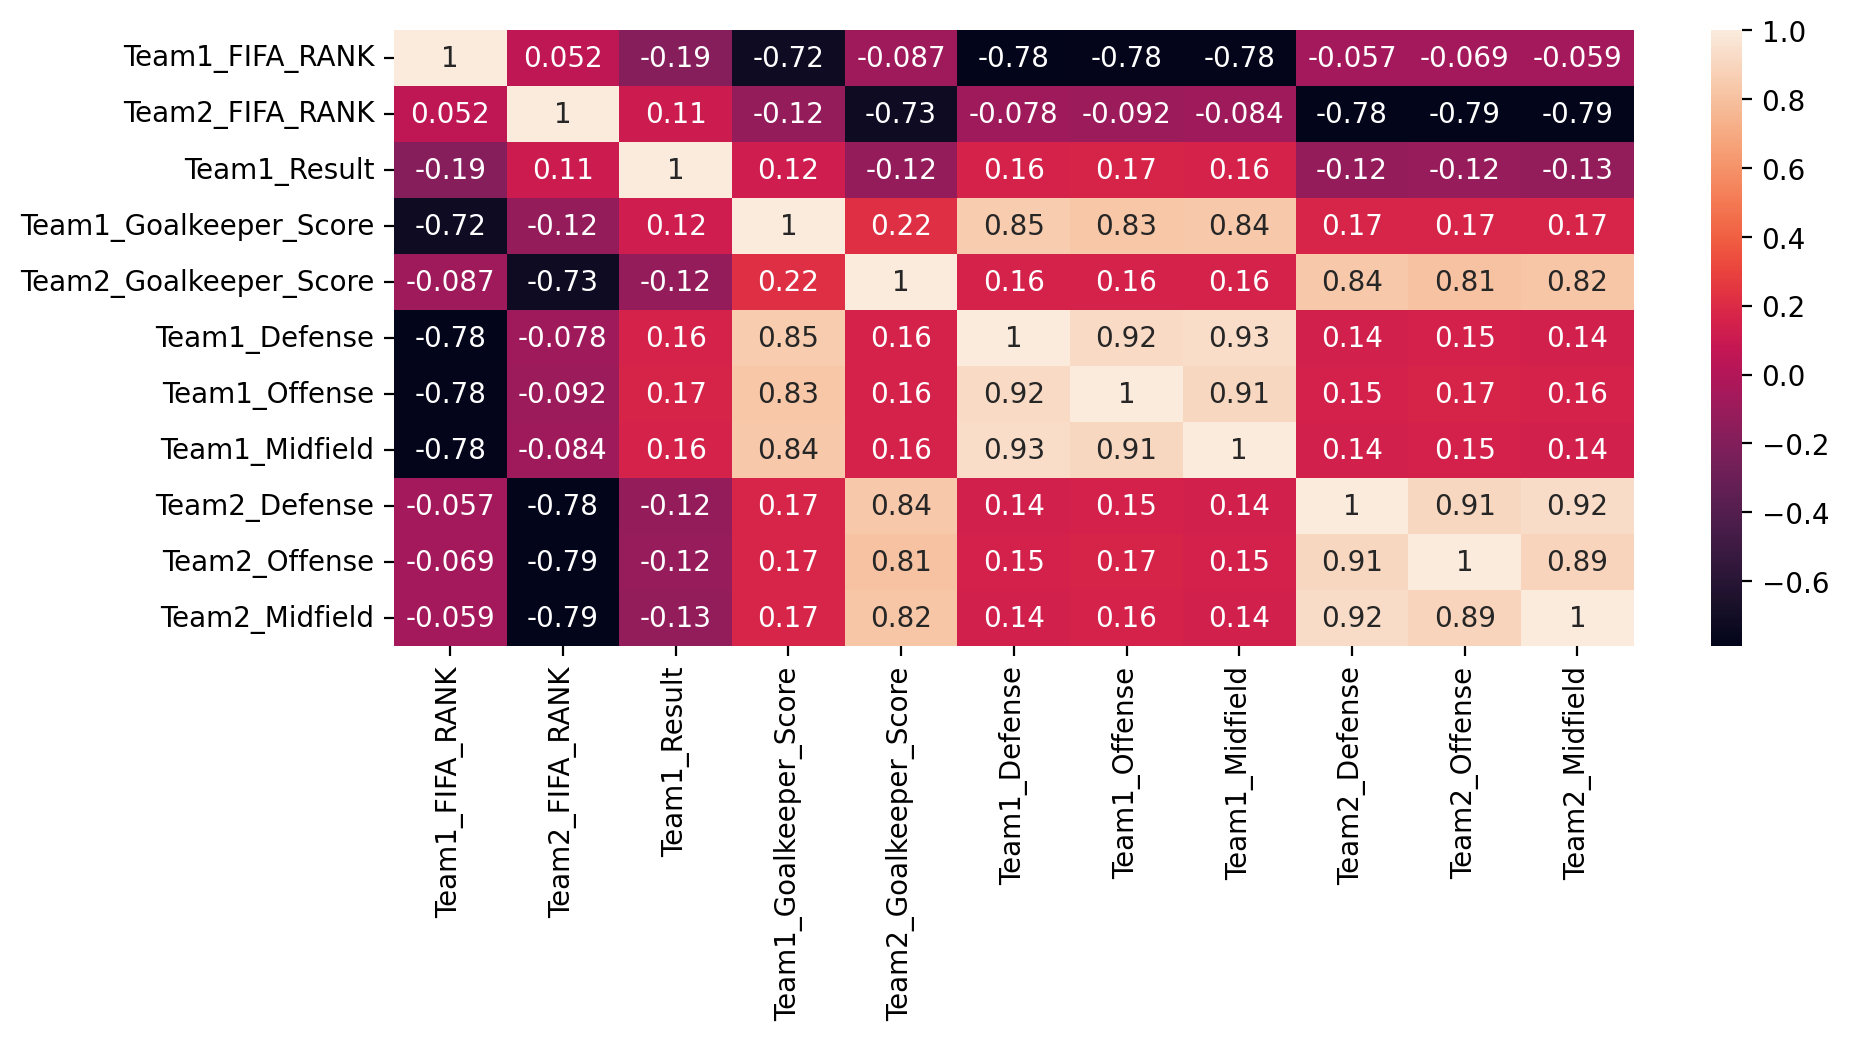

In [23]:
plt.figure(figsize=(10,4),dpi=200)
sns.heatmap(final_df.corr(),annot=True)

In [24]:
#final_df.to_csv("ExtraData.csv")

In [25]:
#Interchanged Team1 and Team 2 details manually in ExtraData.csv to get accuracy results(We can alsoo skip this step)
final_df = pd.read_csv("ExtraData.csv")
final_df.tail()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
18637,Wales,Netherlands,18,10,0,74,81,75,73,78,85,83,84
18638,Belgium,Poland,2,26,1,89,87,81,86,86,75,85,76
18639,Ghana,Chile,60,28,1,74,79,76,76,78,76,77,78
18640,Tunisia,Japan,35,23,1,64,73,71,72,74,75,75,78
18641,Egypt,Korea Republic,32,29,0,70,75,70,79,71,73,80,74


### Modelling

In [26]:
#Saving DF for creating a pipeline model
pipe_DF = final_df
#Create dummies for categorical columns to verify the accuracy percentages
final_df = pd.get_dummies(final_df)

In [27]:
#split X and y and train test split (For League Matches)
X = final_df.drop('Team1_Result',axis=1)
y = final_df['Team1_Result']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
#Validtion and test set
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [29]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

In [30]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

              precision    recall  f1-score   support

           0       0.59      0.69      0.63      1048
           1       0.60      0.68      0.63      1094
           2       0.28      0.14      0.19       655

    accuracy                           0.55      2797
   macro avg       0.49      0.50      0.48      2797
weighted avg       0.52      0.55      0.53      2797



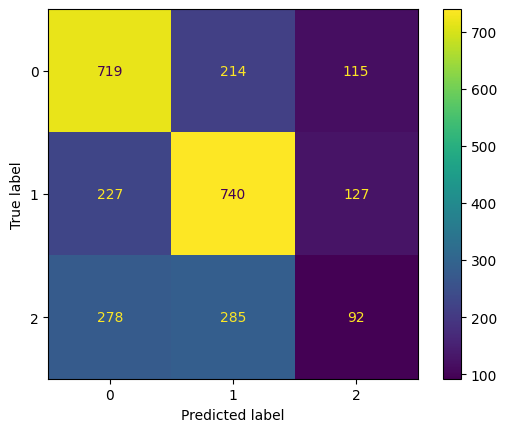

In [31]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier(n_estimators=50))

              precision    recall  f1-score   support

           0       0.59      0.75      0.66      1048
           1       0.59      0.77      0.67      1094
           2       0.46      0.03      0.05       655

    accuracy                           0.59      2797
   macro avg       0.55      0.52      0.46      2797
weighted avg       0.56      0.59      0.52      2797



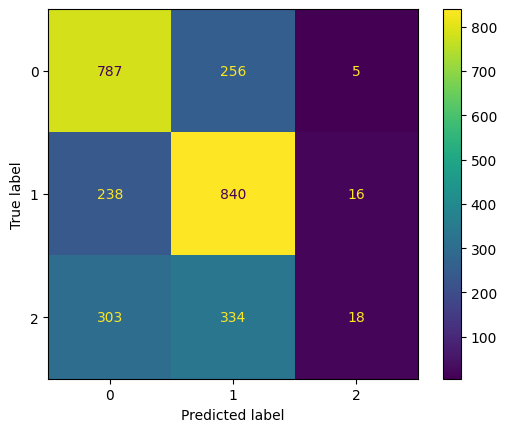

In [32]:
#Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.56      0.64      0.60      1045
           1       0.62      0.65      0.64      1169
           2       0.23      0.14      0.17       582

    accuracy                           0.54      2796
   macro avg       0.47      0.48      0.47      2796
weighted avg       0.52      0.54      0.53      2796



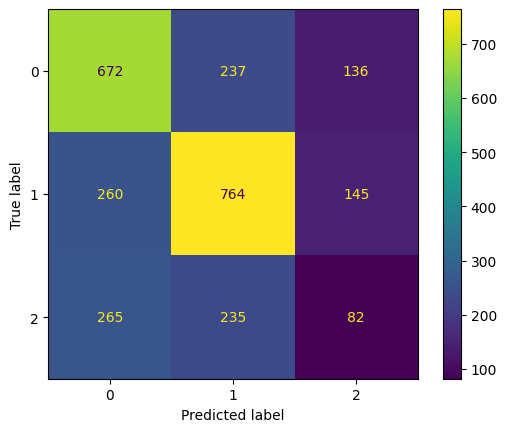

In [33]:
#Checking the final score on testing the holdout test in RandomForest
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

### Creating pipeline model for League matches

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(),['Team1', 'Team2']),remainder='passthrough')

In [35]:
pipe_X = pipe_DF.drop('Team1_Result',axis=1)
pipe_y = pipe_DF['Team1_Result']

In [36]:
from sklearn.pipeline import make_pipeline
pipe_League = make_pipeline(column_trans,StandardScaler(with_mean=False),RandomForestClassifier(n_estimators=50))
pipe_League.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=50))])

#### Saving the league model

In [37]:
import joblib
joblib.dump(pipe_League,"League_model.pkl")

['League_model.pkl']

### Modelling Knockout model

In [38]:
#Predictions for Knockout Stage - Removing Draw status
knock_df = pipe_DF[pipe_DF['Team1_Result'] != 2]

In [39]:
pipe_knock_df = knock_df
knock_df = pd.get_dummies(knock_df)
X = knock_df.drop('Team1_Result',axis=1)
y = knock_df['Team1_Result']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1082
           1       0.74      0.74      0.74      1083

    accuracy                           0.74      2165
   macro avg       0.74      0.74      0.74      2165
weighted avg       0.74      0.74      0.74      2165



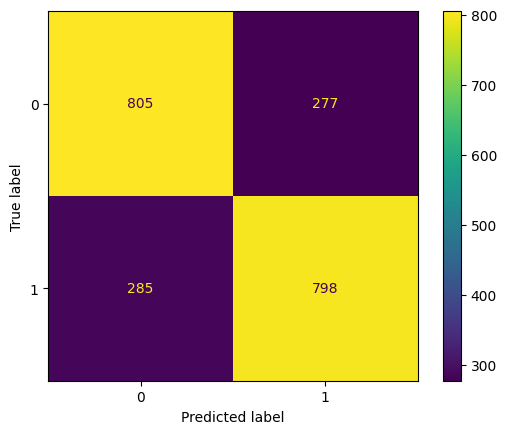

In [40]:
metrics_display(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1082
           1       0.74      0.73      0.73      1083

    accuracy                           0.74      2165
   macro avg       0.74      0.74      0.74      2165
weighted avg       0.74      0.74      0.74      2165



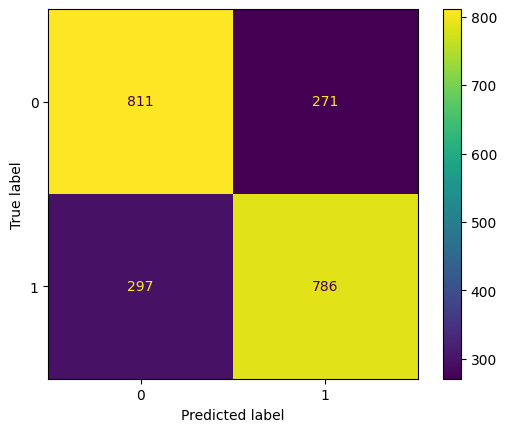

In [41]:
metrics_display(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1082
           1       0.75      0.77      0.76      1082

    accuracy                           0.76      2164
   macro avg       0.76      0.76      0.76      2164
weighted avg       0.76      0.76      0.76      2164



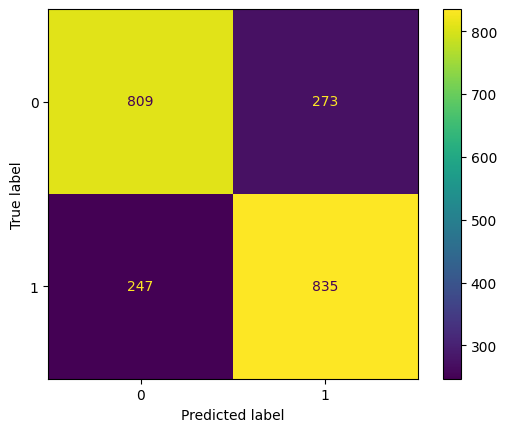

In [42]:
#Random Forest is giving good accuracy, so testing with holdout test and finalising the model
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

### Creating pipeline model for Knockout matches

In [43]:
pipe_X = pipe_knock_df.drop('Team1_Result',axis=1)
pipe_y = pipe_knock_df['Team1_Result']
pipe_knock = make_pipeline(column_trans,StandardScaler(with_mean=False),RandomForestClassifier())
pipe_knock.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier', RandomForestClassifier())])

In [44]:
pipe_knock.predict_proba(pipe_X)

array([[0.3 , 0.7 ],
       [0.08, 0.92],
       [0.94, 0.06],
       ...,
       [0.26, 0.74],
       [0.26, 0.74],
       [0.85, 0.15]])

#### Saving knockout model

In [45]:
joblib.dump(pipe_knock,"KnockOut_model.pkl")

['KnockOut_model.pkl']

#### Saving column names

In [46]:
pipe_X.columns

Index(['Team1', 'Team2', 'Team1_FIFA_RANK', 'Team2_FIFA_RANK',
       'Team1_Goalkeeper_Score', 'Team2_Goalkeeper_Score', 'Team1_Defense',
       'Team1_Offense', 'Team1_Midfield', 'Team2_Defense', 'Team2_Offense',
       'Team2_Midfield'],
      dtype='object')

In [47]:
#Saving the column names
joblib.dump(pipe_X.columns,"col_names.pkl")

['col_names.pkl']

# SIMULATOR

#### Load League, knockout models and column names

In [48]:
league_model = joblib.load("League_model.pkl")
knockout_model = joblib.load("KnockOut_model.pkl")
col_names = joblib.load("col_names.pkl")

#### Load current fifa rankings file

In [49]:
rankings = pd.read_csv("FifaRankings.csv")

In [50]:
rankings.head()

,Team,Rank,ATT,MID,DEF,GK
0,Brazil,1,86.3,85.5,84.8,89
1,Belgium,2,85.7,85.5,80.8,89
2,France,4,88.3,86.8,84.2,87
3,Argentina,3,89.0,84.0,82.2,84
4,England,5,88.0,84.0,85.0,83


#### Create a function to return dataframe of values when we input Team1 and Team2

In [51]:
def TeamList(Team1, Team2):
    Team1_FIFA_RANK = rankings[rankings["Team"] == Team1]['Rank'].to_list()[0]
    Team2_FIFA_RANK = rankings[rankings["Team"] == Team2]['Rank'].to_list()[0]
    Team1_Goalkeeper_Score = rankings[rankings["Team"] == Team1]['GK'].to_list()[0]
    Team1_Defense = rankings[rankings["Team"] == Team1]['DEF'].to_list()[0]
    Team1_Offense = rankings[rankings["Team"] == Team1]['ATT'].to_list()[0]
    Team1_Midfield = rankings[rankings["Team"] == Team1]['MID'].to_list()[0]
    Team2_Goalkeeper_Score = rankings[rankings["Team"] == Team2]['GK'].to_list()[0]
    Team2_Defense = rankings[rankings["Team"] == Team2]['DEF'].to_list()[0]
    Team2_Offense = rankings[rankings["Team"] == Team2]['ATT'].to_list()[0]
    Team2_Midfield = rankings[rankings["Team"] == Team2]['MID'].to_list()[0]
    list_value = [[Team1, Team2, Team1_FIFA_RANK, Team2_FIFA_RANK, Team1_Goalkeeper_Score, Team2_Goalkeeper_Score, Team1_Defense, Team1_Offense, Team1_Midfield, Team2_Defense, Team2_Offense, Team2_Midfield]]
    df = pd.DataFrame(data=list_value,columns=col_names)
    return df

In [52]:
#Checking the function is working fine
TeamList("Brazil", "Spain")

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
0,Brazil,Spain,1,6,89,84,84.8,86.3,85.5,86.5,85.0,86.0


### Creating a function to return the League match result when Team1 and Team2 are inputed

In [53]:
#Team1 - 'Win':1, 'Draw':2, 'Lose':0
def league_model_result(Team1, Team2):
    result = league_model.predict(TeamList(Team1,Team2))
    proba = league_model.predict_proba(TeamList(Team1,Team2))
    if result == 0:
        return Team2, proba[0][0]
    if result == 1:
        return Team1, proba[0][1]
    if result == 2:
        return "Draw", proba[0][2]

In [54]:
# checking if the function is working fine
league_model_result("Spain", "Argentina")

('Argentina', 0.42)

In [55]:
league_model_result("Brazil", "Argentina")

('Draw', 0.56)

### Creating a function to return the Knockout match result when Team1 and Team2 are inputed

In [56]:
#Team1 - 'Win':1,'Lose':0
def knockout_result(Team1, Team2):
    result = knockout_model.predict(TeamList(Team1, Team2))
    proba = knockout_model.predict_proba(TeamList(Team1,Team2))
    if result == 0:
        return Team2, proba[0][0]
    if result == 1:
        return Team1, proba[0][1]

In [57]:
# checking if the function is working fine
knockout_result("France", "Brazil")

('France', 0.7093333333333333)

In [58]:
knockout_result("Brazil", "Argentina")

('Argentina', 0.5166666666666666)

## Simulating League Rounds

### Function to simulate league round - All teams in the group will play against all other teams in the group and top 2 will be considered as winner

In [59]:
def League_round(Team1, Team2, Team3, Team4):
    match1 = league_model_result(Team1, Team2)
    match2 = league_model_result(Team1, Team3)
    match3 = league_model_result(Team1, Team4)
    match4 = league_model_result(Team2, Team3)
    match5 = league_model_result(Team2, Team4)
    match6 = league_model_result(Team3, Team4)
    Points = [match1[0],match2[0],match3[0],match4[0],match5[0],match6[0]]
    Team1_points = Points.count(Team1) * 3
    Team2_points = Points.count(Team2) * 3
    Team3_points = Points.count(Team3) * 3
    Team4_points = Points.count(Team4) * 3
    if match1 == "Draw":
        Team1_points,Team2_points = Team1_points+1,Team2_points+1
    if match2 == "Draw":
        Team1_points,Team3_points = Team1_points+1,Team3_points+1
    if match3 == "Draw":
        Team1_points,Team4_points = Team1_points+1,Team4_points+1
    if match4 == "Draw":
        Team2_points,Team3_points = Team2_points+1,Team3_points+1
    if match5 == "Draw":
        Team2_points,Team4_points = Team2_points+1,Team4_points+1
    if match6 == "Draw":
        Team3_points,Team4_points = Team3_points+1,Team4_points+1
    dict = {Team1:Team1_points,Team2:Team2_points,Team3:Team3_points,Team4:Team4_points}
    grp_winners = pd.DataFrame(list(dict.items()),columns=['Team','Points']).sort_values('Points',ascending=False)[0:2]
    return grp_winners

In [60]:
#checking if function is working fine
League_round("Qatar", "Ecuador","Senegal","Netherlands")

,Team,Points
3,Netherlands,9
2,Senegal,6


### Simulating League round results

In [61]:
Group_A_Winners = League_round("Qatar", "Ecuador","Senegal","Netherlands")
Group_A_Winners

,Team,Points
3,Netherlands,9
2,Senegal,6


In [62]:
Group_B_Winners = League_round("England","IR Iran", "USA", "Wales")
Group_B_Winners

,Team,Points
0,England,9
2,USA,6


In [63]:
Group_C_Winners = League_round("Argentina","Saudi Arabia", "Mexico","Poland")
Group_C_Winners.reset_index()

,index,Team,Points
0,0,Argentina,9
1,3,Poland,6


In [64]:
Group_D_Winners = League_round("France","Australia","Denmark","Tunisia")
Group_D_Winners.reset_index()

,index,Team,Points
0,2,Denmark,9
1,0,France,6


In [65]:
Group_E_Winners = League_round("Spain","Costa Rica","Germany","Japan")
Group_E_Winners.reset_index()

,index,Team,Points
0,0,Spain,6
1,2,Germany,6


In [66]:
Group_F_Winners = League_round("Belgium","Canada","Morocco","Croatia")
Group_F_Winners.reset_index()

,index,Team,Points
0,0,Belgium,9
1,2,Morocco,3


In [67]:
Group_G_Winners = League_round("Brazil","Serbia","Switzerland","Cameroon")
Group_G_Winners.reset_index()

,index,Team,Points
0,0,Brazil,9
1,1,Serbia,6


In [68]:
Group_H_Winners = League_round("Portugal","Ghana","Uruguay","Korea Republic")
Group_H_Winners.reset_index()

,index,Team,Points
0,0,Portugal,9
1,2,Uruguay,6


### Simulating Knockout matches -Round of 16

In [69]:
#Grp1A, Grp2B
W49 = knockout_result(Group_A_Winners['Team'].iloc[0], Group_B_Winners['Team'].iloc[1])
W49

('Netherlands', 0.73)

In [70]:
#Grp1C, Grp2D
W50 = knockout_result(Group_C_Winners['Team'].iloc[0], Group_D_Winners['Team'].iloc[1])
W50

('France', 0.53)

In [71]:
#Grp1B, Grp2A
W51 = knockout_result(Group_B_Winners['Team'].iloc[0], Group_A_Winners['Team'].iloc[1])
W51

('England', 0.61)

In [72]:
#Grp1D, Grp2C
W52 = knockout_result(Group_D_Winners['Team'].iloc[0], Group_C_Winners['Team'].iloc[1])
W52

('Denmark', 0.63)

In [73]:
#Grp1E, Grp2F
W53 = knockout_result(Group_E_Winners['Team'].iloc[0], Group_F_Winners['Team'].iloc[1])
W53

('Spain', 0.6523333333333332)

In [74]:
#Grp1G, Grp2H
W54 = knockout_result(Group_G_Winners['Team'].iloc[0], Group_H_Winners['Team'].iloc[1])
W54

('Brazil', 0.95)

In [75]:
#Grp1F, Grp2E
W55 = knockout_result(Group_F_Winners['Team'].iloc[0], Group_E_Winners['Team'].iloc[1])
W55

('Germany', 0.58)

In [76]:
#Grp1H, Grp2G
W56 = knockout_result(Group_H_Winners['Team'].iloc[0], Group_G_Winners['Team'].iloc[1])
W56

('Serbia', 0.73)

### Round of 16 Winners

In [77]:
print("",W49,"\n",W50,"\n",W51,"\n",W52,"\n",W53,"\n",W54,"\n",W55,"\n",W56)

 ('Netherlands', 0.73) 
 ('France', 0.53) 
 ('England', 0.61) 
 ('Denmark', 0.63) 
 ('Spain', 0.6523333333333332) 
 ('Brazil', 0.95) 
 ('Germany', 0.58) 
 ('Serbia', 0.73)


### Simulating Round of 8 - QuaterFinals

In [78]:
#W49, W50
W57 = knockout_result(W49[0], W50[0])
W57

('France', 0.5533333333333333)

In [79]:
#W53, W54
W58 = knockout_result(W53[0], W54[0])
W58

('Brazil', 0.59)

In [80]:
#W51, W52
W59 = knockout_result(W51[0], W52[0])
W59

('England', 0.65)

In [81]:
#W55, W56
W60 = knockout_result(W55[0], W56[0])
W60

('Germany', 0.66)

### QuaterFinals Winners

In [82]:
print("",W57,"\n",W58,"\n",W59,"\n",W60)

 ('France', 0.5533333333333333) 
 ('Brazil', 0.59) 
 ('England', 0.65) 
 ('Germany', 0.66)


### Simulating SemiFinals

In [83]:
#W57,W58
final1 = knockout_result(W57[0], W58[0])
final1

('France', 0.7093333333333333)

In [84]:
#W59,W60
final2 = knockout_result(W59[0], W60[0])
final2

('England', 0.5833333333333333)

### SemiFinals Winner

In [85]:
print("",final1,"\n",final2)

 ('France', 0.7093333333333333) 
 ('England', 0.5833333333333333)


### 3rd place Match

In [86]:
team1 = list([W57[0], W58[0]])
team1.remove(final1[0])
team1 = team1[0]
team1

'Brazil'

In [87]:
team2 = list([W59[0], W60[0]])
team2.remove(final2[0])
team2 = team2[0]
team2

'Germany'

In [88]:
thirdPlace = knockout_result(team1,team2)
thirdPlace

('Brazil', 0.66)

## FINALS 

In [89]:
Finals = knockout_result(final1[0], final2[0])
Finals

('France', 0.711)

In [90]:
Runner= list([final1[0], final2[0]])
Runner.remove(Finals[0])
Runner = Runner[0]
Runner

'England'

In [91]:
print("Winner is {}".format(Finals[0]))
print("2nd Place is {}".format(Runner))
print("3rd Place is {}".format(thirdPlace[0]))

Winner is France
2nd Place is England
3rd Place is Brazil
